In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from mua.train import gen

folder = Path("./examples/generations/")

os.makedirs(folder, exist_ok=True)

In [ ]:
from sklearn.datasets import load_digits  # (8x8 grayscale digits)

digits = load_digits().images
print("Original dataset", digits.shape)
flatten_digits = digits.reshape((digits.shape[0], -1))
print("Flattened dataset", flatten_digits.shape)

flatten_digits = 2 * ((flatten_digits / flatten_digits.max()) - 0.5)

Original dataset (1797, 8, 8)
Flattened dataset (1797, 64)


In [6]:
np.min(flatten_digits), np.max(flatten_digits)

(np.float64(-1.0), np.float64(1.0))

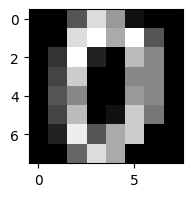

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(digits[0], cmap="grey")

MMD=0.004747: 100%|███████████████████████████████████| 1000/1000 [07:16<00:00,  2.29it/s]


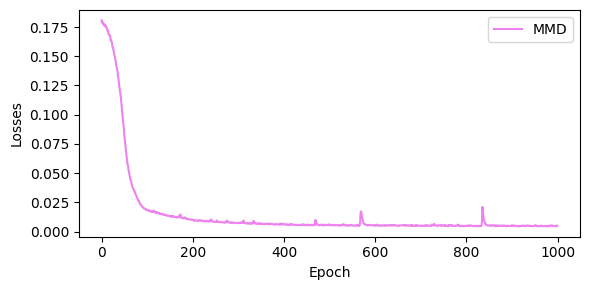

In [17]:
depth = 24 # A higher depth results in a more complicated training
num_epochs = 1000
num_imgs = len(flatten_digits) // 4 # Split each epoch into 4 batches
lr = 0.005

params, params_history, loss_history, fake_flattendigits = gen.train(
    flatten_digits,
    depth,
    num_epochs,
    num_imgs,
    lr,
    generate=len(flatten_digits.data),
    save=str(folder),
)

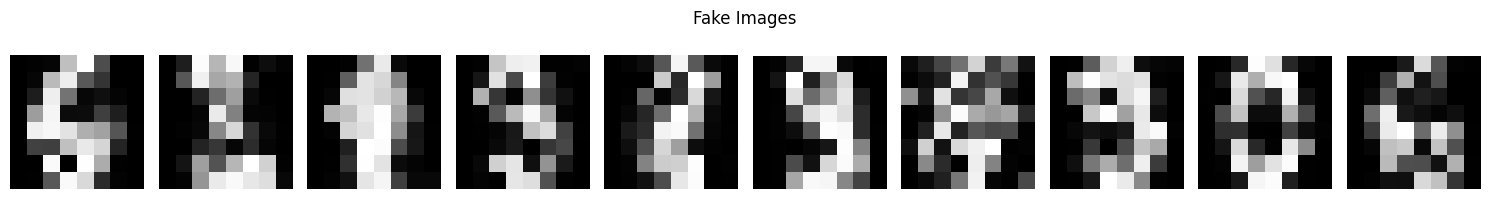

In [18]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1 row, 10 columns

for i in range(10):
    ax = axes[i]
    ax.imshow(fake_flattendigits[i].reshape(8, 8), cmap="gray")
    ax.axis("off")  # Remove axes for cleaner look

plt.suptitle("Fake Images")
plt.tight_layout()
plt.savefig(folder / "fake_images.pdf")